In [2]:
from cProfile import label
from graphviz import Digraph
from micrograd.engine import Value
from typing import Final


def trace(root) -> tuple[set[Value], set[tuple[Value, Value]]]:
    nodes: Final[set[Value]] = set()
    edges: Final[set[tuple[Value, Value]]] = set()
    def build(v: Value) -> None:
        if v in nodes:
            return
        nodes.add(v)
        for child in v.prev:
            edges.add((child, v))
            build(child)
    build(root)
    return nodes, edges

def draw_dot(root, format='svg', graph_orientation='LR') -> Digraph:
    """
    format: png | svg | ...
    graph_orientation: TB (top to bottom graph) | LR (left to right)
    """
    assert graph_orientation in ['LR', 'TB']
    nodes, edges = trace(root)
    dot: Final[Digraph] = Digraph(format=format,
                                  graph_attr={'rankdir': graph_orientation})

    for n in nodes:
        curr_id: str = str(id(n))
        if len(n.label) == 0:
            node_label: str = f"{{ data {n.data:.4f} | grad {n.grad:.4f} }}"
        else:
            node_label: str = f"{{ {n.label} | data {n.data:.4f} | grad {n.grad:.4f} }}"
        # Add data node.
        dot.node(name=curr_id, label = node_label, shape='record')
        if n._op:
            # Add operation node and connect it to the data node.
            # Only the data node that is produced by an operation has an operation node connected to it.
            dot.node(name=curr_id + n._op, label=n._op)
            dot.edge(curr_id + n._op, curr_id)

    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot

In [3]:
x = Value(-4.0)
y = Value(2.0)
z = x + y
print(f"x = {x}")
print(f"y = {y}")
print(f"z = {z}")

x = Value(data=-4.0, grad=0)
y = Value(data=2.0, grad=0)
z = Value(data=-2.0, grad=0)


In [4]:
x.data = 3.0
print(f"x = {x}")

x = Value(data=3.0, grad=0)


In [5]:
x += y
print(f"x = {x}")

x = Value(data=5.0, grad=0)


In [6]:
xx = 2 + x
print(f"xx = {xx}")

xx = Value(data=7.0, grad=0)


In [7]:
negative_x = -x
print(f"negative_x = {negative_x}")

negative_x = Value(data=-5.0, grad=0)


In [8]:
x2 = x * 2
print(f"x2 = {x2}")

x2 = Value(data=10.0, grad=0)


In [9]:
two_times_x = 2 * x
print(f"two_times_x = {two_times_x}")

two_times_x = Value(data=10.0, grad=0)


In [10]:
x_raised_to_3 = x ** 3
print(f"x_raised_to_3 = {x_raised_to_3}")

x_raised_to_3 = Value(data=125.0, grad=0)


In [11]:
x_divided_by_2 = x / 2
print(f"x_divided_by_2 = {x_divided_by_2}")

x_divided_by_2 = Value(data=2.5, grad=0)


In [12]:
two_divided_by_x = 2.0 / x
print(f"x = {x}")
print(f"two_divided_by_x = {two_divided_by_x}")

x = Value(data=5.0, grad=0)
two_divided_by_x = Value(data=0.4, grad=0)


In [13]:
three_minus_x = 3 - x
print(f"three_minus_x = {three_minus_x}")

three_minus_x = Value(data=-2.0, grad=0)


In [14]:
x = Value(3.0)
y = Value(-1)

print(f"x.relu() = {x.relu()}")
print(f"y.relu() = {y.relu()}")

x.relu() = Value(data=3.0, grad=0)
y.relu() = Value(data=0, grad=0)


y = Value(data=3.0, grad=0)


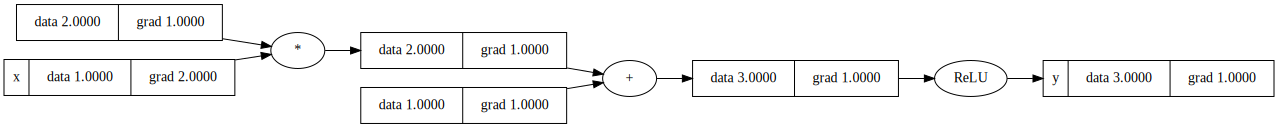

In [15]:
x = Value(1.0, label='x')
y = (x * 2 + 1).relu()
y.label = 'y'
print(f"y = {y}")

y.grad = 1.0
y.backward()
draw_dot(y)

In [16]:
import random
from micrograd import nn

random.seed(1337)
n = nn.Neuron(2)


In [17]:
x = [Value(1.0), Value(-2.0)]
y = n(x)
print(y)

Value(data=0.102443419482938, grad=0)


In [18]:
y.backward()
print(y)

Value(data=0.102443419482938, grad=1)


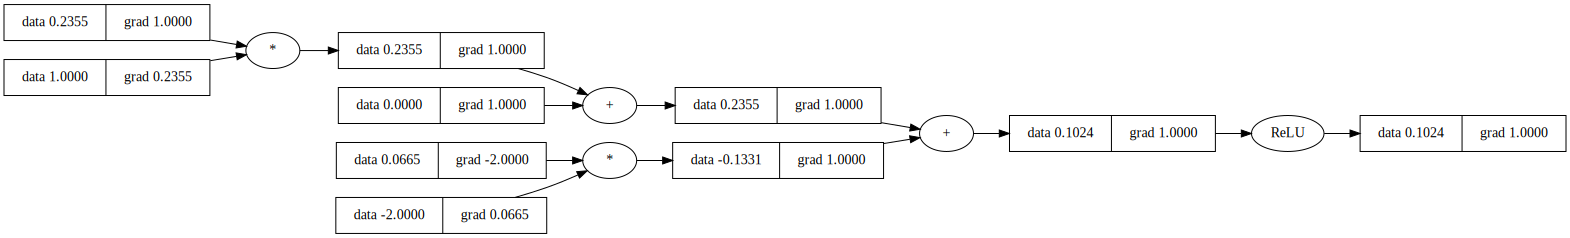

In [19]:
dot = draw_dot(y)
dot